In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit import Aer, execute
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram


import numpy as np 
import cmath 

from q_to_q.conversion_qo_qiskit import puzzle_to_circuit, add_gates,read_circuit,get_nr_q,get_statevector

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Examples :

### Circuits from QK_QO converrted again in Qiskit

In [3]:
path="Circuits/QK_QO/example_002.qpf"
puzzle=read_circuit(path)

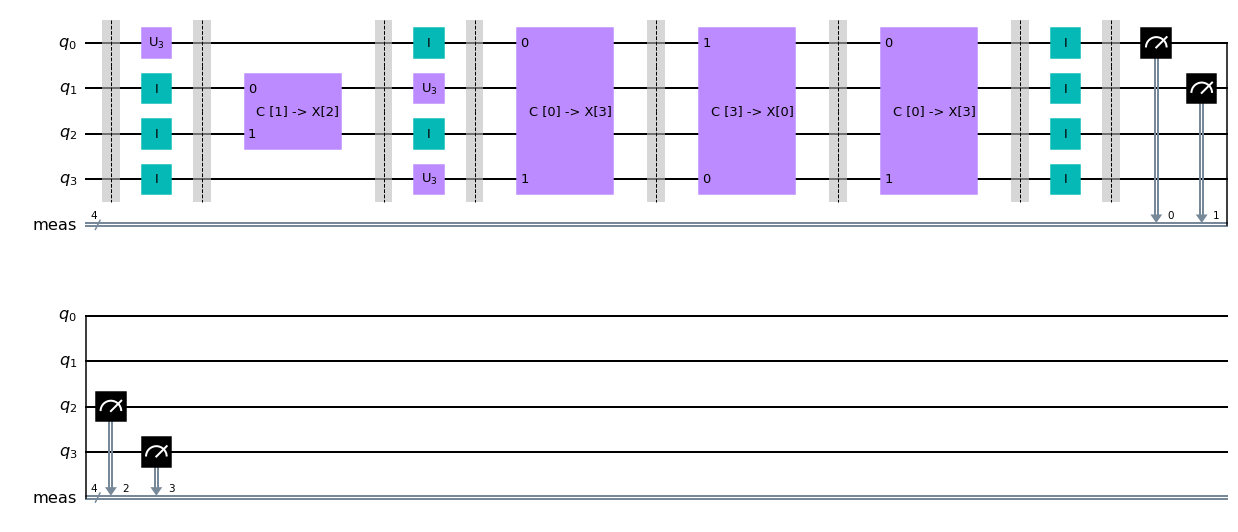

In [4]:
qc=puzzle_to_circuit(puzzle, initial_state=False)  
qc.measure_all()
qc.draw('mpl')

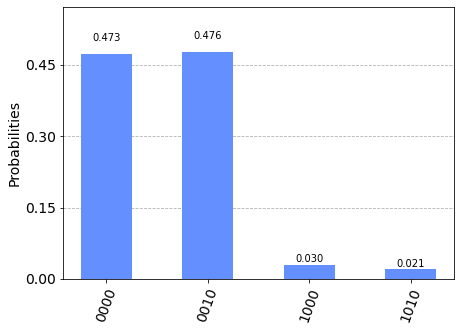

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Now let's runn the circuit on a real device:

In [6]:
provider =IBMQ.get_provider('ibm-q')
ibm_QPU=provider.get_backend('ibmq_santiago')

job=execute(qc, backend=ibm_QPU, shots=100)
job_monitor(job,interval=10) 

Job Status: job has successfully run


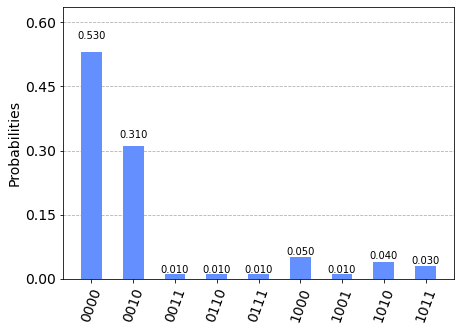

In [7]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### another example:

In [8]:
path="Circuits/QO_circuits/asdasd.qpf"

In [9]:
res=read_circuit(path)
res.keys()

dict_keys(['PuzzleDefinition', 'PuzzleGates', 'AvailableGates', 'Tooltips'])

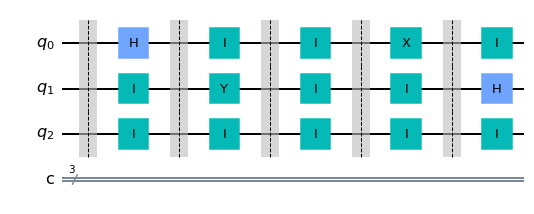

In [10]:
qc=QuantumCircuit(get_nr_q(res),get_nr_q(res))

add_gates(res,qc,barrier=True)

qc.draw('mpl')

In [11]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.+0.5j -0.-0.5j  0.-0.5j  0.+0.5j  0.+0.j   0.+0.j   0.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.5j  0.-0.5j -0.-0.5j  0.+0.j   0.+0.j   0.+0.j   0.+0.j ]
 [-0.-0.5j  0.+0.5j  0.-0.5j  0.+0.5j  0.+0.j   0.+0.j   0.+0.j   0.+0.j ]
 [-0.-0.5j -0.-0.5j  0.-0.5j -0.-0.5j  0.+0.j   0.+0.j   0.+0.j   0.+0.j ]
 [ 0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.5j -0.-0.5j  0.-0.5j  0.+0.5j]
 [ 0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.5j  0.+0.5j  0.-0.5j -0.-0.5j]
 [ 0.+0.j   0.+0.j   0.+0.j   0.+0.j  -0.-0.5j  0.+0.5j  0.-0.5j  0.+0.5j]
 [ 0.+0.j   0.+0.j   0.+0.j   0.+0.j  -0.-0.5j -0.-0.5j  0.-0.5j -0.-0.5j]]


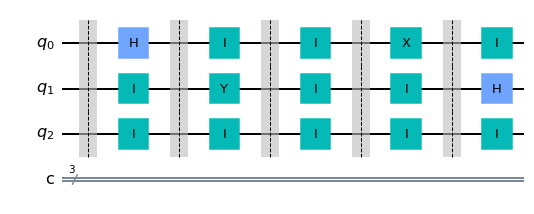

In [12]:
backend = Aer.get_backend('qasm_simulator')
result = transpile(qc, backend=backend, optimization_level=3)
result.draw(output='mpl')

In [13]:
# It is important to have as many decimals as possible 
# Otherwise we can get unitary erros (even if we can introduce the gate in the circuit) .

unit=[[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j,  0.70710679+0.j],#np.sqrt(1/2)+0.j,  np.sqrt(1/2)+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j, -0.70710679+0.j],]#np.sqrt(1/2)+0.j,  -np.sqrt(1/2)+0.j],]#0.70710679+0.j, -0.70710679+0.j],]


qc=QuantumCircuit(2)
qc.unitary(unit,[0,1])
qc.draw()

┌──────────┐
q_0: ┤0         ├
     │  unitary │
q_1: ┤1         ├
     └──────────┘

In [14]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
gate unitary140673959791536 p0,p1 {
	u3(3*pi/4,0,-2*pi) p0;
	u3(pi/2,2*pi,0) p1;
	cx p0,p1;
	u3(3*pi/4,pi,-pi) p0;
	u3(pi/2,0,pi) p1;
}
unitary140673959791536 q[0],q[1];

